<a href="https://colab.research.google.com/github/mab2004/Pneumonia-Detection-CNN/blob/main/Pneumonia_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

# --- Mount Google Drive ---
print("--- Mounting Google Drive ---")
drive.mount('/content/drive')

--- Mounting Google Drive ---
Mounted at /content/drive


In [2]:
# --- Step 2: Unzip the Dataset ---
# IMPORTANT: Update the 'zipped_file_path' with the actual location of your .zip file in Google Drive.
# For example, if it's in a folder called 'Colab Notebooks', the path would be '/content/drive/MyDrive/Colab Notebooks/chest_xray.zip'
print("\n--- Unzipping the Dataset ---")
zipped_file_path = '/content/drive/MyDrive/chest_xray.zip' # CHANGE THIS PATH TO YOUR FILE LOCATION
destination_path = './' # Unzip to the current directory


--- Unzipping the Dataset ---


In [3]:
!unzip -q {zipped_file_path} -d {destination_path}

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# --- Step 1: Data Preprocessing ---
print("--- Data Preprocessing ---")

# Define directories
base_dir = './chest_xray'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

# Use ImageDataGenerator for loading and preprocessing images
# Rescale pixel values to [0, 1] and resize images to 128x128.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

print("Data preprocessing complete.")


--- Data Preprocessing ---
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Data preprocessing complete.


In [6]:
print("\n--- Building the CNN Model ---")

model = Sequential([
    # First convolutional layer with 32 filters, followed by a Max-Pooling layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer with 64 filters, followed by a Max-Pooling layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output to feed into the dense layers
    Flatten(),

    # Two dense layers for classification
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()
print("\nModel building complete.")



--- Building the CNN Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)


Model building complete.


In [7]:
# --- Step 3: Model Training ---
print("\n--- Starting Model Training ---")

# Train the model with the training and validation data
history = model.fit(
    train_generator,
    epochs=10,  # Training for 10 epochs
    validation_data=val_generator
)

print("\nModel training complete.")



--- Starting Model Training ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 290ms/step - accuracy: 0.8493 - loss: 0.4330 - val_accuracy: 0.8750 - val_loss: 0.2801
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.9574 - loss: 0.1176 - val_accuracy: 0.9375 - val_loss: 0.1531
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.9748 - loss: 0.0715 - val_accuracy: 0.8125 - val_loss: 0.3951
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 278ms/step - accuracy: 0.9840 - loss: 0.0448 - val_accuracy: 0.8750 - val_loss: 0.2859
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.9828 - loss: 0.0467 - val_accuracy: 0.9375 - val_loss: 0.2172
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - accuracy: 0.9893 - loss: 0.0269 - val_accuracy: 0.9375 - val_loss: 0.2004
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.9896 - loss: 0.0241 - val_accuracy: 0.9375 - val_loss: 0.1432
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 268ms/step - accuracy: 0.9908 - loss: 0


--- Starting Model Evaluation ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.7454 - loss: 2.6763
Test Loss: 2.8465
Test Accuracy: 0.7292
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


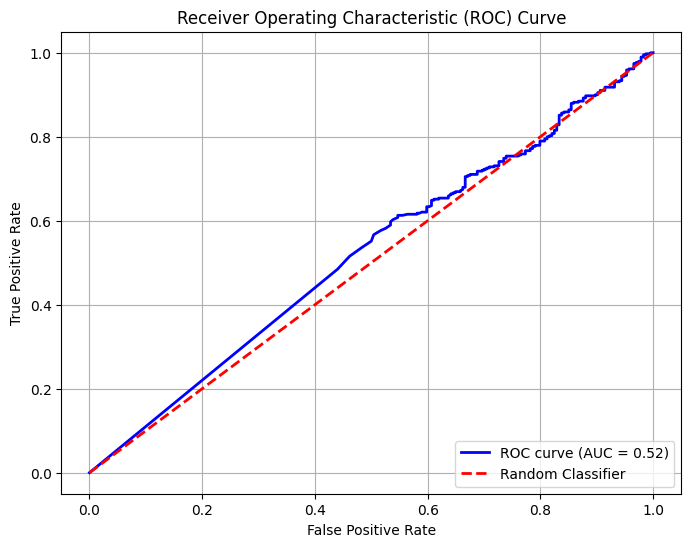


Model evaluation and ROC curve plotting complete.


In [8]:
# --- Step 4: Model Evaluation and ROC Curve ---
print("\n--- Starting Model Evaluation ---")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get true labels and predicted probabilities for the ROC curve
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator).ravel()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("\nModel evaluation and ROC curve plotting complete.")